# Matplotlib

In [1]:
from matplotlib import pyplot as plt

In [2]:
x = [10, 20, 30, 40]
y = [0, 15, 10, 25]

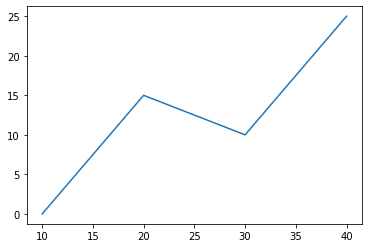

In [3]:
plt.plot(x, y);

# Seaborn

\#1. Seaborn updates `matplotlib`'s rc parameters to improve aesthetics

In [4]:
import seaborn as sns

In [5]:
sns.set() 

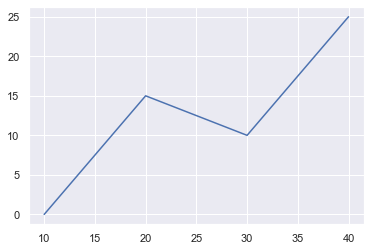

In [6]:
plt.plot(x, y);

In [7]:
sns.set_style("white")

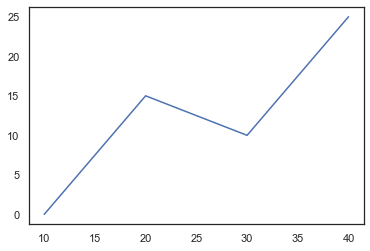

In [8]:
plt.plot(x, y);

#### Versions

In [9]:
import matplotlib
matplotlib.__version__

'3.4.3'

In [10]:
sns.__version__

'0.11.2'

## Seaborn with `pandas`

\#2. Let Seaborn group, aggregate, and plot your `pandas` dataframes

In [11]:
cars = sns.load_dataset('mpg')

In [12]:
type(cars)

pandas.core.frame.DataFrame

In [13]:
cars.dropna(inplace=True)

cars.shape

(392, 9)

In [14]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


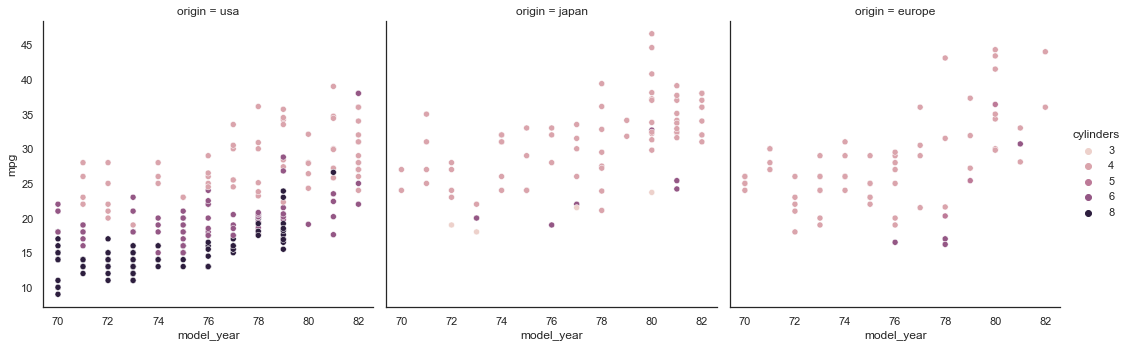

In [15]:
sns.relplot(x='model_year', y='mpg', col='origin', hue='cylinders', data=cars);

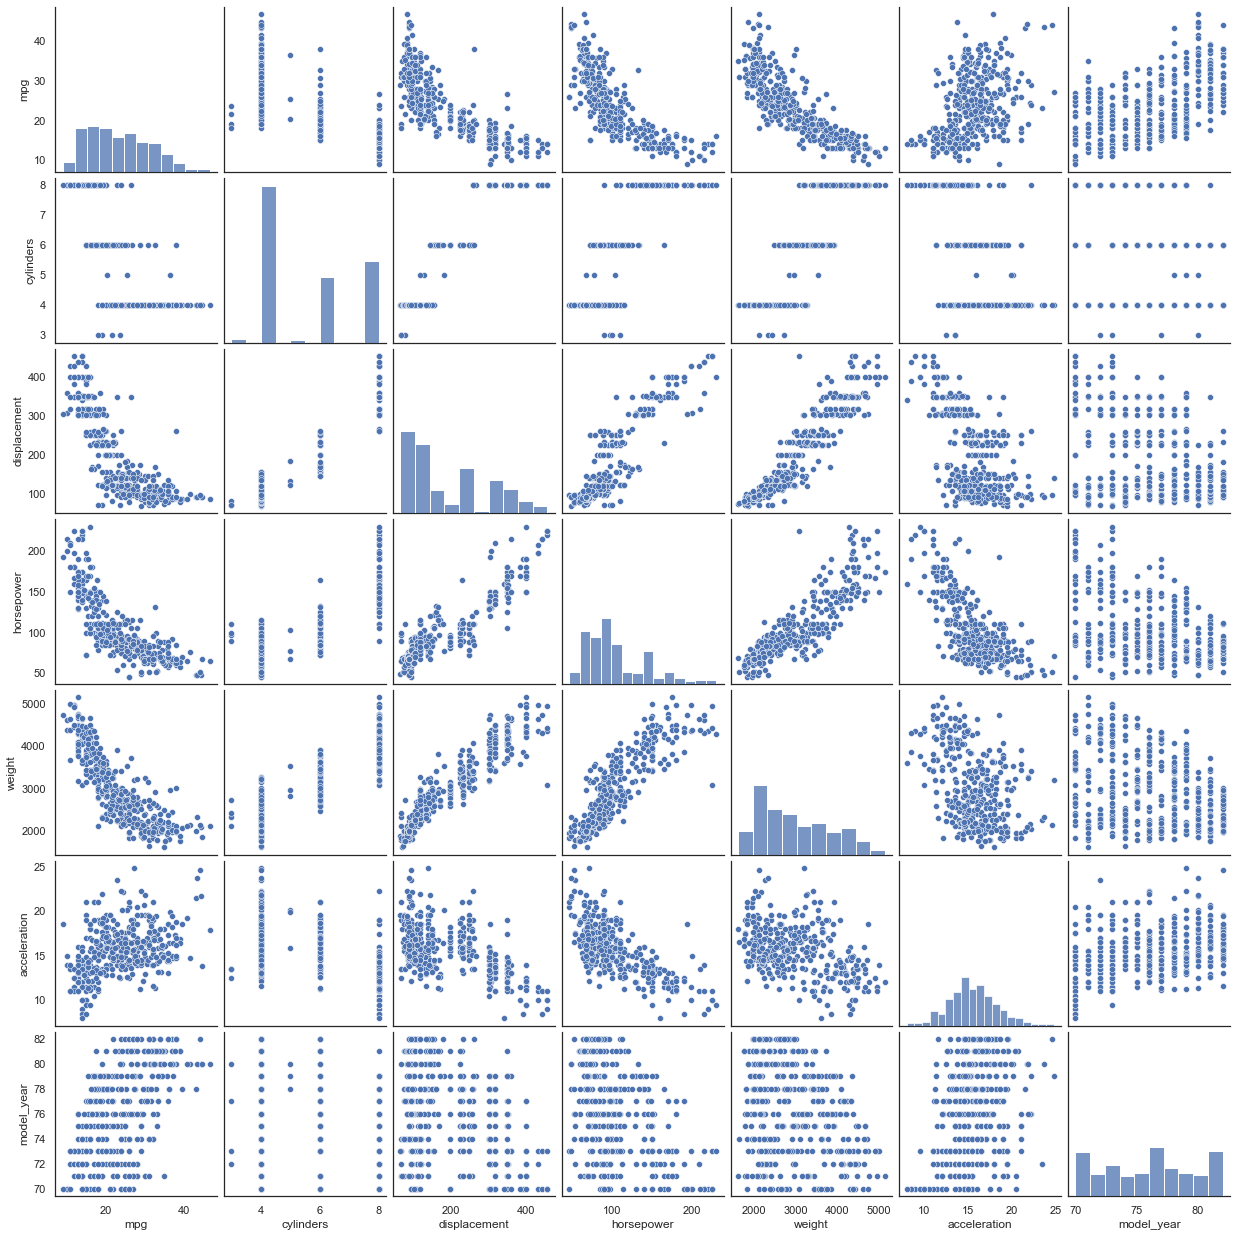

In [22]:
sns.pairplot(cars);

## More Examples

\#3. Seaborn allows for additional plot types and easy plotting functionality

/home/adarshanand67/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/adarshanand67/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/home/adarshanand67/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/adarshanand67/anaconda3/lib/python3.9/site-packages/seaborn/distributions.p

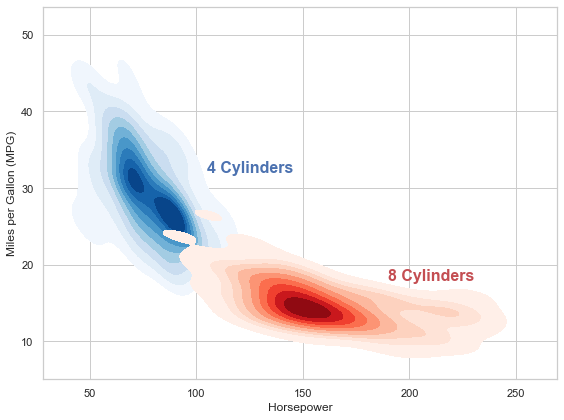

In [16]:
sns.set_style('whitegrid')

cyl_4 = cars[cars.cylinders==4]
cyl_8 = cars[cars.cylinders==8]

plt.figure(figsize=(8,6))

sns.kdeplot(cyl_4.horsepower, cyl_4.mpg,
            cmap="Blues", shade=True, shade_lowest=False)
sns.kdeplot(cyl_8.horsepower, cyl_8.mpg,
            cmap="Reds", shade=True, shade_lowest=False)

plt.xlabel('Horsepower')
plt.ylabel('Miles per Gallon (MPG)')

plt.annotate("4 Cylinders", (105, 32), color='b', fontsize=16, fontweight='bold')
plt.annotate("8 Cylinders", (190, 18), color='r', fontsize=16, fontweight='bold')
plt.tight_layout()

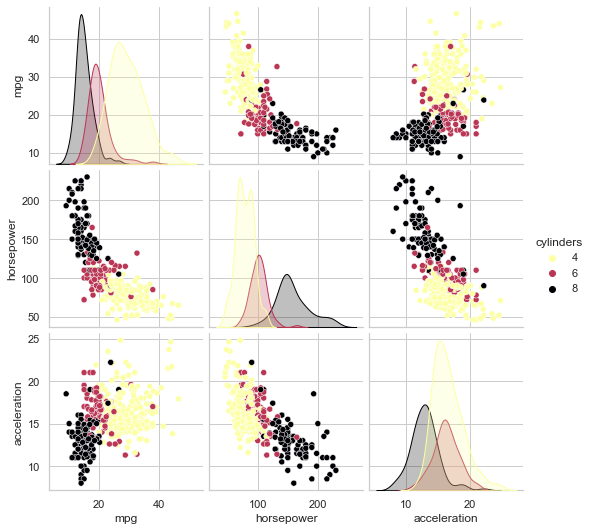

In [17]:
sns.pairplot(cars[cars.cylinders.isin([4,6,8])], 
             hue='cylinders', 
             vars=['mpg', 'horsepower', 'acceleration'], 
             palette='inferno_r'
            );

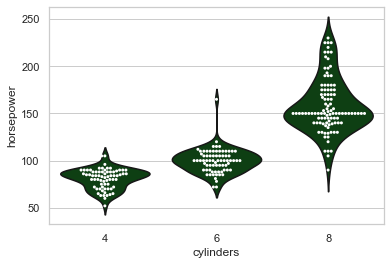

In [18]:
usa = cars[cars.origin == 'usa']

sns.violinplot(x=usa.cylinders, y=usa.horsepower,
               scale='width', inner=None, color='xkcd:forest green'
              )
sns.swarmplot(x=usa.cylinders, y=usa.horsepower,
              color='white', size=3
             );

/home/adarshanand67/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


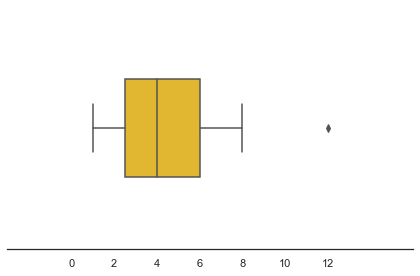

In [19]:
sns.set_style('white')
pts = [1, 1.5, (7/3), 3, 3.75, 4.25, 5, 19/3, 8, 12]

plt.figure(figsize=(6,4))
sns.boxplot(pts, color='xkcd:golden yellow', width=0.4)
sns.despine(left=True)
plt.xlim(-3, 16)
plt.xticks(range(0,13,2))
plt.tight_layout();

/home/adarshanand67/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


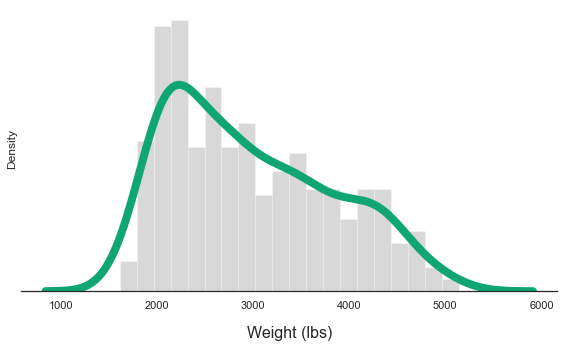

In [20]:
plt.figure(figsize=(8,5))
sns.distplot(cars.weight, 
             bins=20,
             kde_kws={"lw": 8, 'color':'xkcd:bluish green'},
             hist_kws={'alpha': 0.3, 'color':'gray'}
            )

sns.despine(left=True)
plt.xlabel('Weight (lbs)', fontsize=16, labelpad=15)
plt.yticks([])
plt.tight_layout();

/home/adarshanand67/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 11.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 576x432 with 0 Axes>

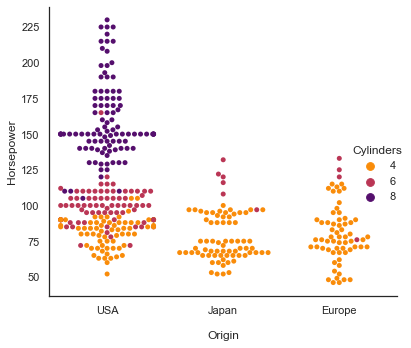

In [21]:
plt.figure(figsize=(8,6))
g = sns.catplot(x='origin', y='horsepower', hue='cylinders', 
                kind='swarm', 
                palette=sns.color_palette('inferno_r', 3,),
                data=cars[cars.cylinders.isin([4, 6, 8])]
               )

plt.xlabel('\nOrigin')
plt.ylabel('Horsepower')
plt.gca().set_xticklabels(['USA', 'Japan', 'Europe'])
g._legend.set_title('Cylinders')
plt.tight_layout();